In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('Churn.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
pd.set_option('display.max_columns', None)

In [8]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})
df['OnlineSecurity'] = df['OnlineSecurity'].replace({'No internet service': 'No'})
df['OnlineBackup'] = df['OnlineBackup'].replace({'No internet service': 'No'})
df['DeviceProtection'] = df['DeviceProtection'].replace({'No internet service': 'No'})
df['TechSupport'] = df['TechSupport'].replace({'No internet service': 'No'})
df['StreamingTV'] = df['StreamingTV'].replace({'No internet service': 'No'})
df['StreamingMovies'] = df['StreamingMovies'].replace({'No internet service': 'No'})

In [11]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [12]:
cols = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

for col in cols:
    print((df[col] == 0).sum())

5901
11
0
0


In [13]:
median_val = df['tenure'].median()
df['tenure'] = df['tenure'].replace(0, median_val)

In [14]:
(df['tenure'] == 0).sum()

0

In [15]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.416442,64.761692
std,0.368612,24.526454,30.090047
min,0.000000,1.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<Axes: xlabel='tenure', ylabel='Count'>

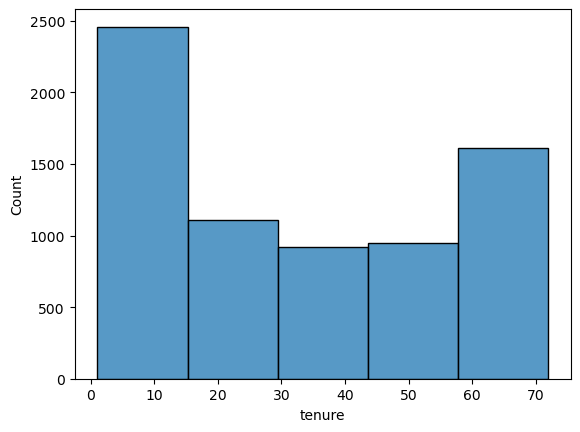

In [16]:
sns.histplot(bins = 5, x='tenure', data=df)

<Axes: xlabel='Contract', ylabel='count'>

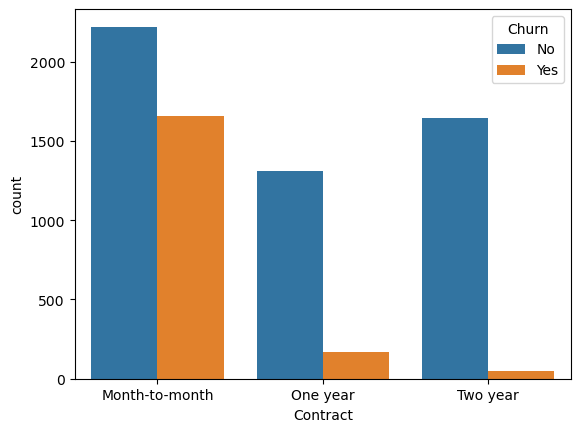

In [17]:
sns.countplot(x='Contract', hue='Churn', data=df)

In [18]:
df.duplicated().sum()

0

In [19]:
# Converting categorical data into numerical data
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})
df['Partner'] = df['Partner'].map({'No': 0, 'Yes': 1})
df['Dependents'] = df['Dependents'].map({'No': 0, 'Yes': 1})
df['PhoneService'] = df['PhoneService'].map({'No': 0, 'Yes': 1})
df['MultipleLines'] = df['MultipleLines'].map({'No': 0, 'Yes': 1})
df['InternetService'] = df['InternetService'].map({'No': 0, 'DSL': 1, 'Fiber optic': 2})
df['OnlineSecurity'] = df['OnlineSecurity'].map({'No': 0, 'Yes': 1})
df['OnlineBackup'] = df['OnlineBackup'].map({'No': 0, 'Yes': 1})
df['DeviceProtection'] = df['DeviceProtection'].map({'No': 0, 'Yes': 1})
df['TechSupport'] = df['TechSupport'].map({'No': 0, 'Yes': 1})
df['StreamingTV'] = df['StreamingTV'].map({'No': 0, 'Yes': 1})
df['StreamingMovies'] = df['StreamingMovies'].map({'No': 0, 'Yes': 1})
df['Contract'] = df['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'No': 0, 'Yes': 1})
df['PaymentMethod'] = df['PaymentMethod'].map({'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)':3})
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [20]:
df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,1889.5,0
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,0,1,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,151.65,1
5,9305-CDSKC,1,0,0,0,8,1,1,2,0,0,1,0,1,1,0,1,0,99.65,820.5,1
6,1452-KIOVK,0,0,0,1,22,1,1,2,0,1,0,0,1,0,0,1,3,89.10,1949.4,0
7,6713-OKOMC,1,0,0,0,10,0,0,1,1,0,0,0,0,0,0,0,1,29.75,301.9,0
8,7892-POOKP,1,0,1,0,28,1,1,2,0,0,1,1,1,1,0,1,0,104.80,3046.05,1
9,6388-TABGU,0,0,0,1,62,1,0,1,1,1,0,0,0,0,1,0,2,56.15,3487.95,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [22]:
# If the column having float values but their data type is showing object then most of the cases blank spaces are their in values 
# So first remove that and then convert data type
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [23]:
df.drop('customerID', axis=1, inplace=True)

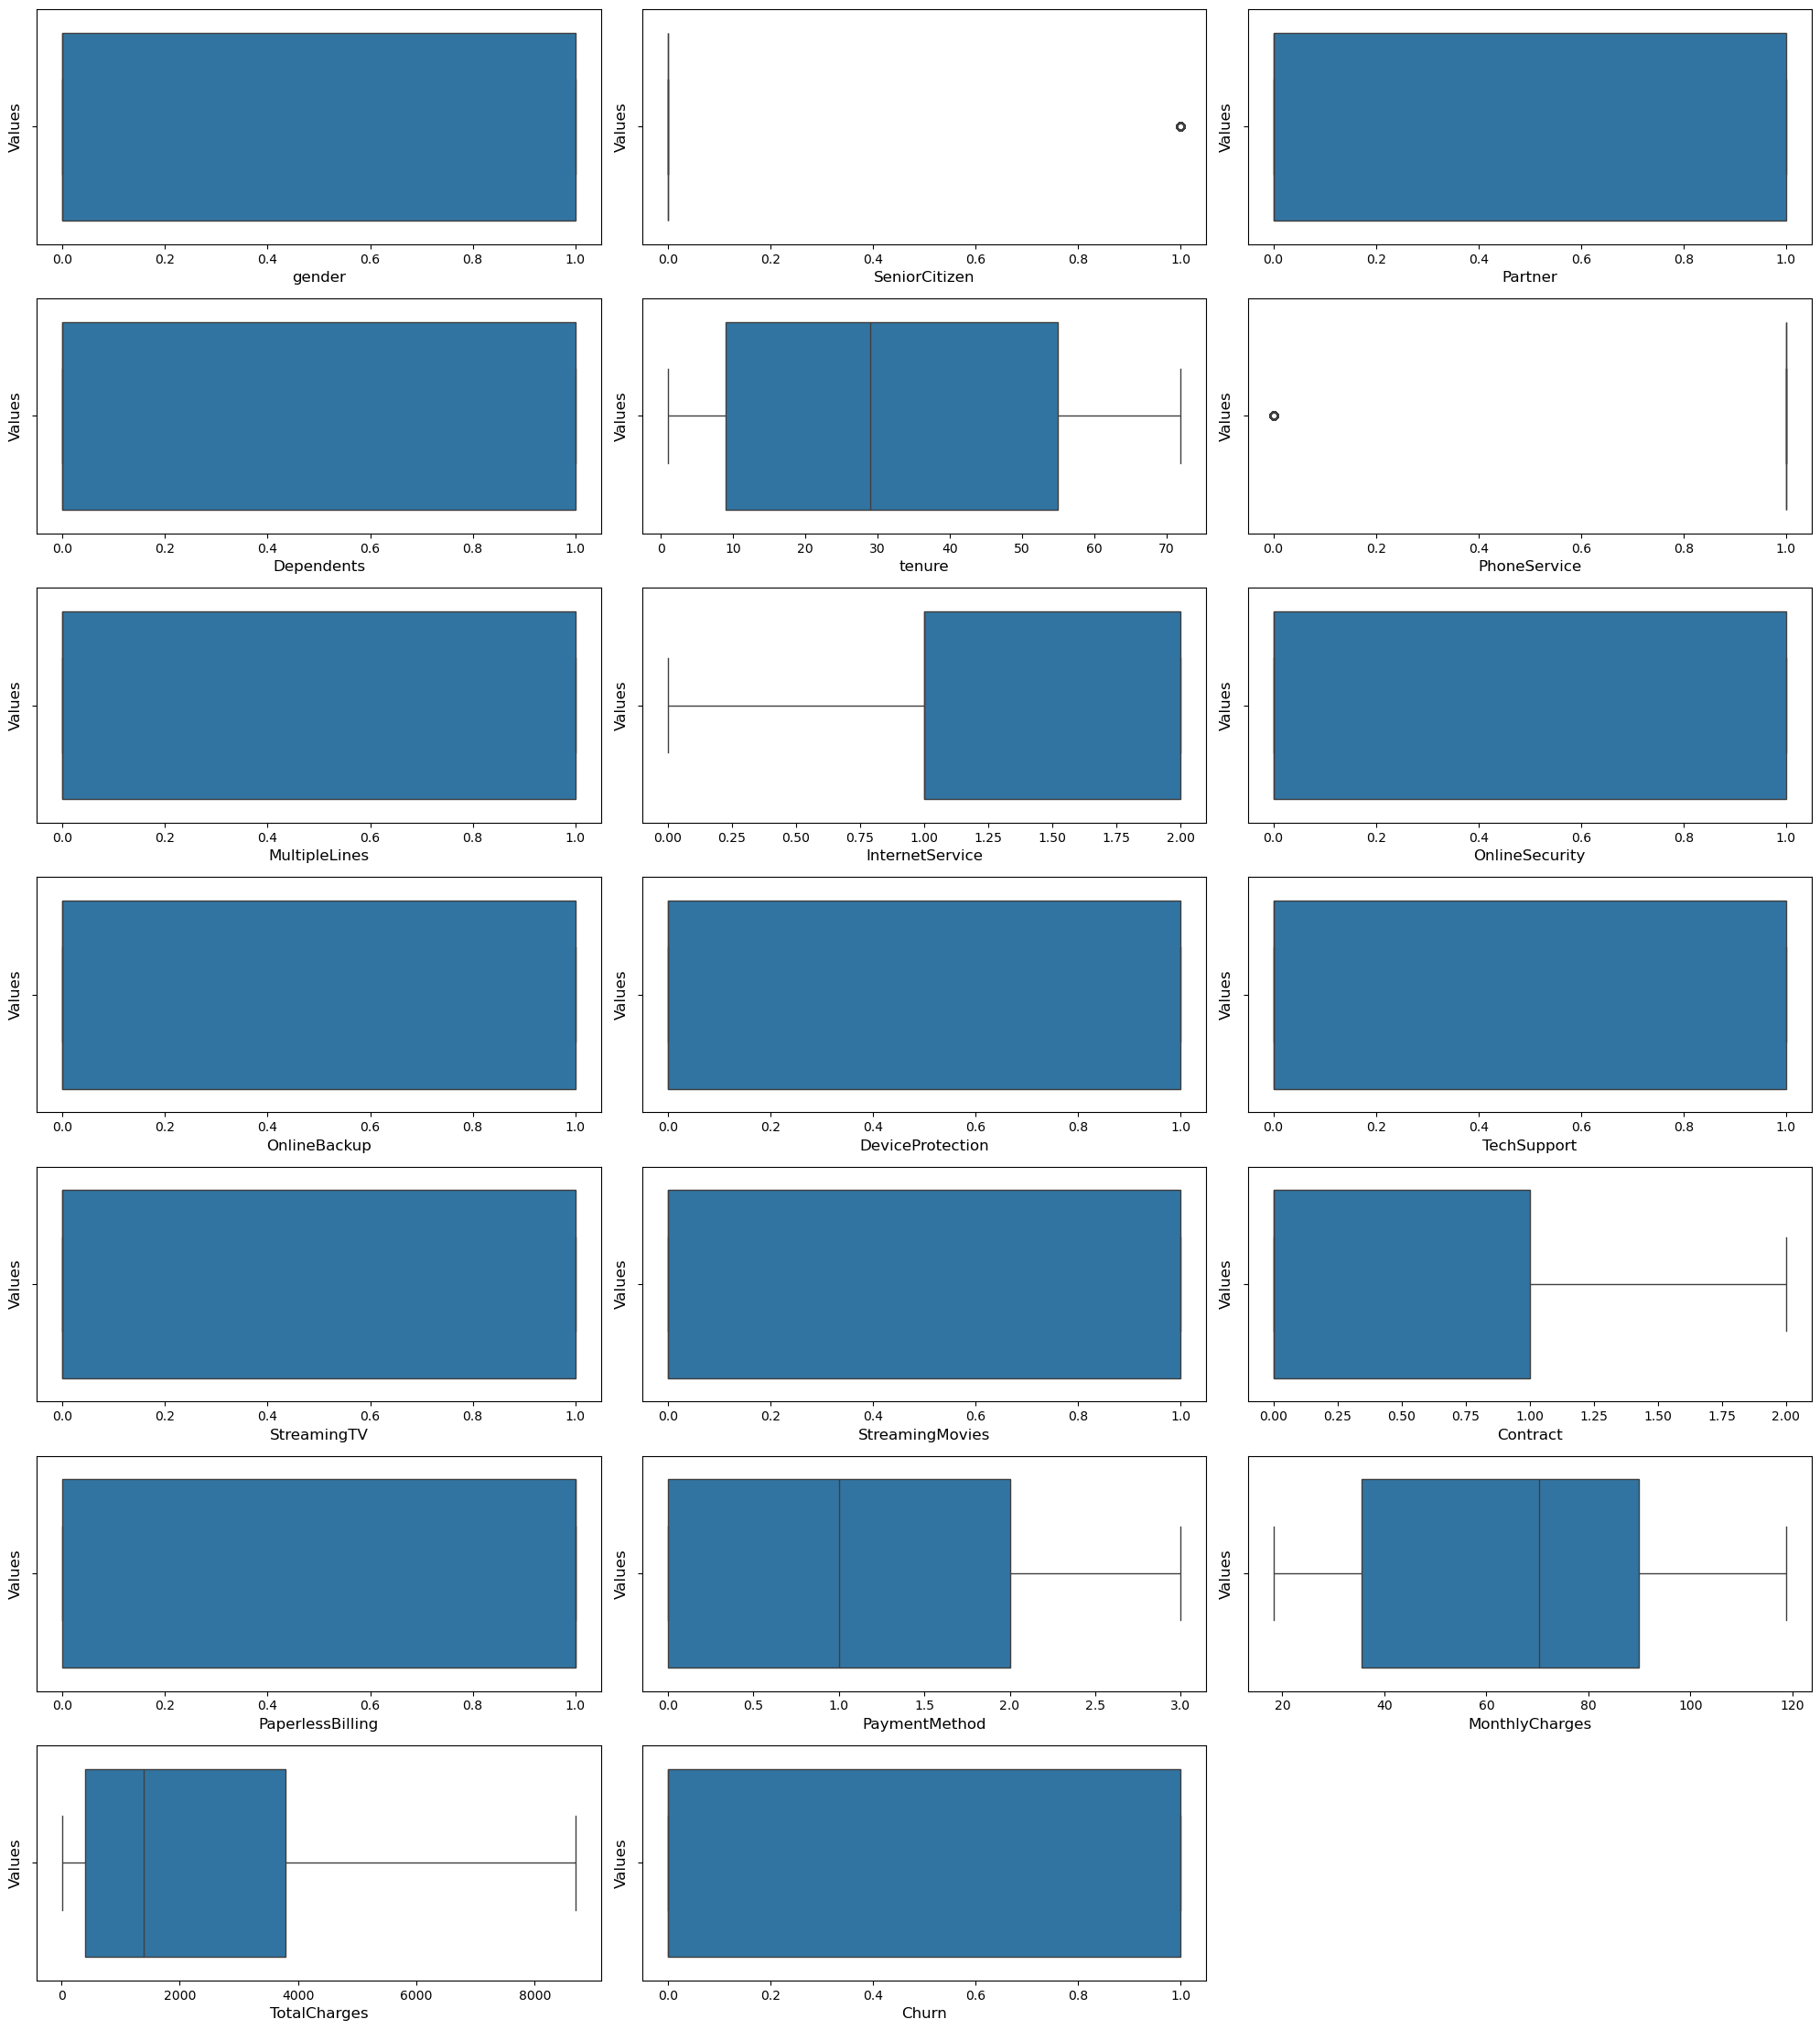

In [24]:
plt.figure(figsize=(20, 25), facecolor='white') # set figure size + background color
plotnumber = 1 # initialize

for column in  df:
    if plotnumber <= 20: # only 9 subplots (3x3 grid)
        ax = plt.subplot(8,3, plotnumber)
        sns.boxplot(x=df[column], ax=ax)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Values', fontsize=12)        
    plotnumber+=1
plt.tight_layout()
plt.show()

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

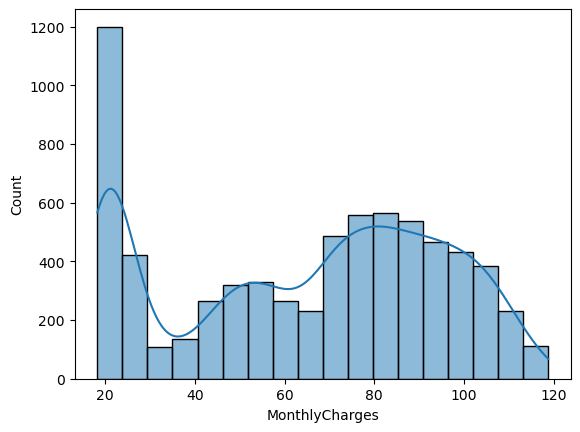

In [25]:
sns.histplot(data=df, x='MonthlyCharges', kde=True)

In [26]:
df['MonthlyCharges'] = np.log(df['MonthlyCharges'] + 1)

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

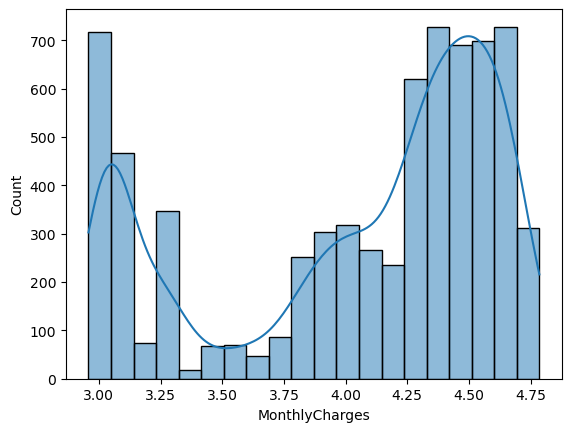

In [27]:
sns.histplot(data=df, x='MonthlyCharges', kde=True)

In [28]:
df.drop(['TotalCharges'], axis=1, inplace=True)

In [29]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
        'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']
cols_to_scale = ['tenure', 'MonthlyCharges']
scaled_data = sc.fit_transform(df[cols_to_scale])

In [30]:
con_data = df[X]

In [31]:
data2 = pd.DataFrame(scaled_data, columns=['tenure', 'MonthlyCharges'])

In [32]:
final_df = pd.concat([data2, con_data], axis=1)

In [33]:
final_df

,tenure,MonthlyCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0.000000,0.258016,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0
1,0.464789,0.602917,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,1,0
2,0.014085,0.572840,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1
3,0.619718,0.443484,0,0,0,0,0,0,1,1,0,1,1,0,0,1,0,2,0
4,0.014085,0.719396,1,0,0,0,1,0,2,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.323944,0.817611,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0
7039,1.000000,0.923905,1,0,1,1,1,1,2,0,1,1,0,1,1,1,1,3,0
7040,0.140845,0.253564,1,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0
7041,0.042254,0.746923,0,1,1,0,1,1,2,0,0,0,0,0,0,0,1,1,1


In [34]:
final_df.Churn.value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [35]:
# minority = df[df.Churn == 1]
# n_needed = df[df.Churn == 0].shape[0] - minority.shape[0]
# minority_upsampled = minority.sample(n=n_needed, replace=True, random_state=42)
# df_balanced = pd.concat([df, minority_upsampled], ignore_index=True)
# df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
# print(df_balanced['Churn'].value_counts())

In [36]:
x = final_df.iloc[:,:-1] 
y = final_df.Churn 

In [37]:
x

,tenure,MonthlyCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0.000000,0.258016,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0
1,0.464789,0.602917,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,1
2,0.014085,0.572840,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,1
3,0.619718,0.443484,0,0,0,0,0,0,1,1,0,1,1,0,0,1,0,2
4,0.014085,0.719396,1,0,0,0,1,0,2,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.323944,0.817611,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1
7039,1.000000,0.923905,1,0,1,1,1,1,2,0,1,1,0,1,1,1,1,3
7040,0.140845,0.253564,1,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0
7041,0.042254,0.746923,0,1,1,0,1,1,2,0,0,0,0,0,0,0,1,1


In [38]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [40]:
# For numeric columns
x_train = x_train.fillna(x_train.mean())
x_test = x_test.fillna(x_test.mean())

In [41]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=0.8, penalty='l2', class_weight='balanced')
clf.fit(x_train, y_train)

LogisticRegression(C=0.8, class_weight='balanced')

In [42]:
y_pred = clf.predict(x_test)

In [43]:
y_pred

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, classification_report, f1_score

In [45]:
acc = accuracy_score(y_test, y_pred)
acc

0.7622427253371186

In [46]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[766, 270],
       [ 65, 308]], dtype=int64)

In [47]:
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,766,270
1,65,308


In [48]:
y_test.value_counts()

Churn
0    1036
1     373
Name: count, dtype: int64

In [49]:
fpr = 98/(98+938)
fpr

0.0945945945945946

In [50]:
recall = recall_score(y_test, y_pred)
recall

0.8257372654155496

In [51]:
precision = precision_score(y_test, y_pred)
precision

0.532871972318339

In [52]:
f1 = f1_score(y_test, y_pred)
f1

0.647739221871714

In [53]:
cr = classification_report(y_test, y_pred)
cr

'              precision    recall  f1-score   support\n\n           0       0.92      0.74      0.82      1036\n           1       0.53      0.83      0.65       373\n\n    accuracy                           0.76      1409\n   macro avg       0.73      0.78      0.73      1409\nweighted avg       0.82      0.76      0.77      1409\n'

In [54]:
y_p = pd.Series(y_pred)

In [55]:
y_p.value_counts()

0    831
1    578
Name: count, dtype: int64